In [ ]:
#Installing the needed libraries
!pip install librosa tensorflow matplotlib

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
screaming_file_path = '/content/drive/My Drive/DeepLearning/code/dataset/Screaming'
notScreaming_file_path = '/content/drive/My Drive/DeepLearning/code/dataset/NotScreaming'

In [ ]:
data_path = "/content/drive/My Drive/DeepLearning/code/dataset/"

X_val = np.load(data_path + 'X_val.npy')
X_test = np.load(data_path + 'X_test.npy')
y_val = np.load(data_path + 'y_val.npy')
y_test = np.load(data_path + 'y_test.npy')
X_train = np.load(data_path + 'X_train.npy')
y_train = np.load(data_path + 'y_train.npy')

In [ ]:
data_path = "/content/drive/My Drive/DeepLearning/code/dataset/"

X_train_da = np.load(data_path + 'X_train_da.npy')
y_train_da = np.load(data_path + 'y_train_da.npy')


## Class_Weights on Baseline

In [ ]:
# Computation of class_weights
y_train_classes = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_classes), y=y_train_classes)
class_weights = dict(enumerate(class_weights))

print("Class Weights:", class_weights)

Class Weights: {0: 0.654639175257732, 1: 2.1166666666666667}


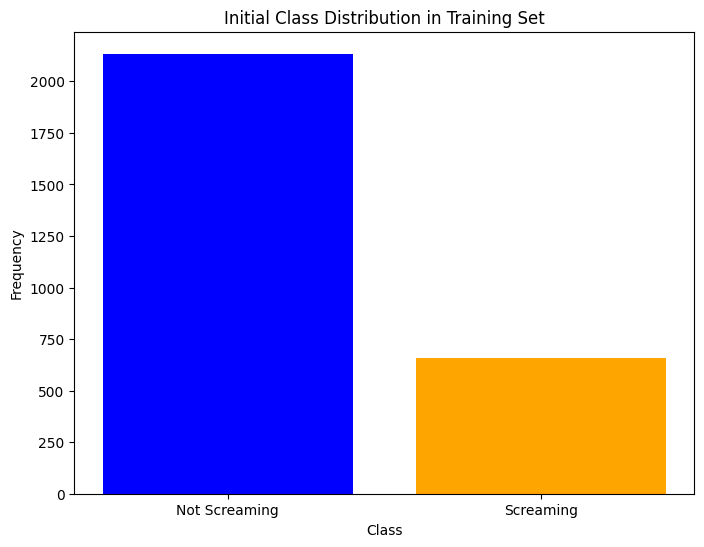

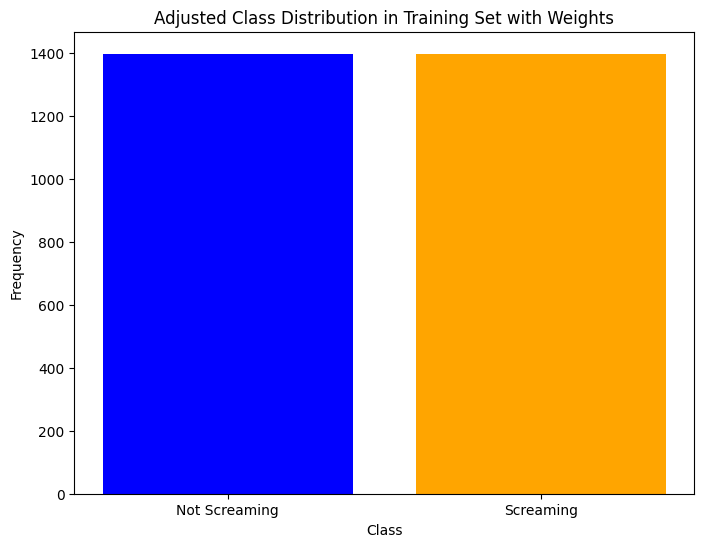

In [ ]:
# Function to plot the class distribution
def plot_class_distribution(class_counts, title):
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(class_counts)), class_counts, color=['blue', 'orange'])
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(range(len(class_counts)), ['Not Screaming', 'Screaming'])
    plt.show()

# Calculate the class distributions in the training set
train_class_counts = np.bincount(y_train_classes)

# Plot the initial class distribution
plot_class_distribution(train_class_counts, 'Initial Class Distribution in Training Set')

# Adjust the distribution with the weights (if we assume the weights are proportional to the distribution)
adjusted_train_class_counts = train_class_counts * np.array([class_weights[0], class_weights[1]])

# Plot the adjusted class distribution
plot_class_distribution(adjusted_train_class_counts, 'Adjusted Class Distribution in Training Set with Weights')


## Class_weights after Data Augmentation

In [ ]:

# Computation of class_weights
y_train_da_classes = np.argmax(y_train_da, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_da_classes), y=y_train_da_classes)
class_weights = dict(enumerate(class_weights))

print("Class Weights:", class_weights)

Class Weights: {0: 0.822265625, 1: 1.2757575757575759}


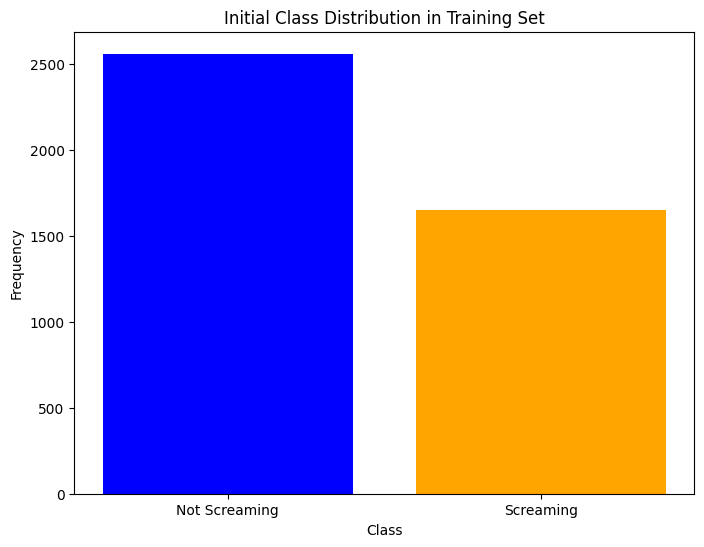

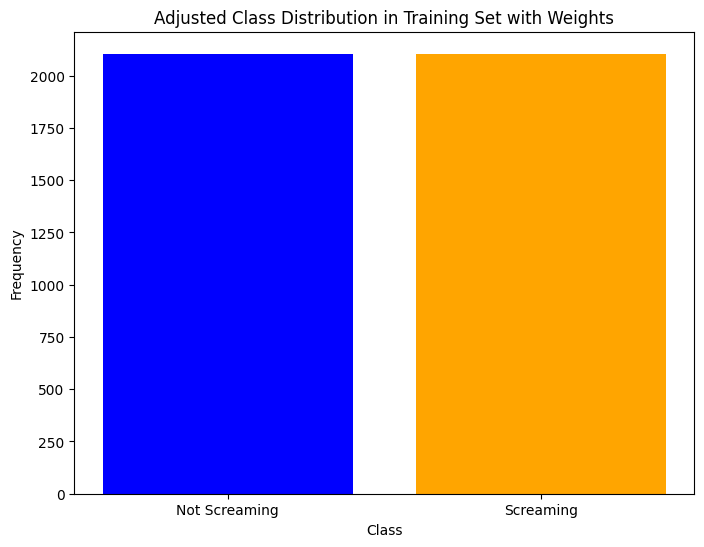

In [ ]:

# Function to plot the class distribution
def plot_class_distribution(class_counts, title):
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(class_counts)), class_counts, color=['blue', 'orange'])
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(range(len(class_counts)), ['Not Screaming', 'Screaming'])
    plt.show()

# Calculate the class distributions in the training set
train_da_class_counts = np.bincount(y_train_da_classes)

# Plot the initial class distribution
plot_class_distribution(train_da_class_counts, 'Initial Class Distribution in Training Set')

# Adjust the distribution with the weights (if we assume the weights are proportional to the distribution)
adjusted_train_da_class_counts = train_da_class_counts * np.array([class_weights[0], class_weights[1]])

# Plot the adjusted class distribution
plot_class_distribution(adjusted_train_da_class_counts, 'Adjusted Class Distribution in Training Set with Weights')
